In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('data/data_with_coords50000.csv')

In [7]:
correlation_matrix = data.corr()

ValueError: could not convert string to float: 'Active'

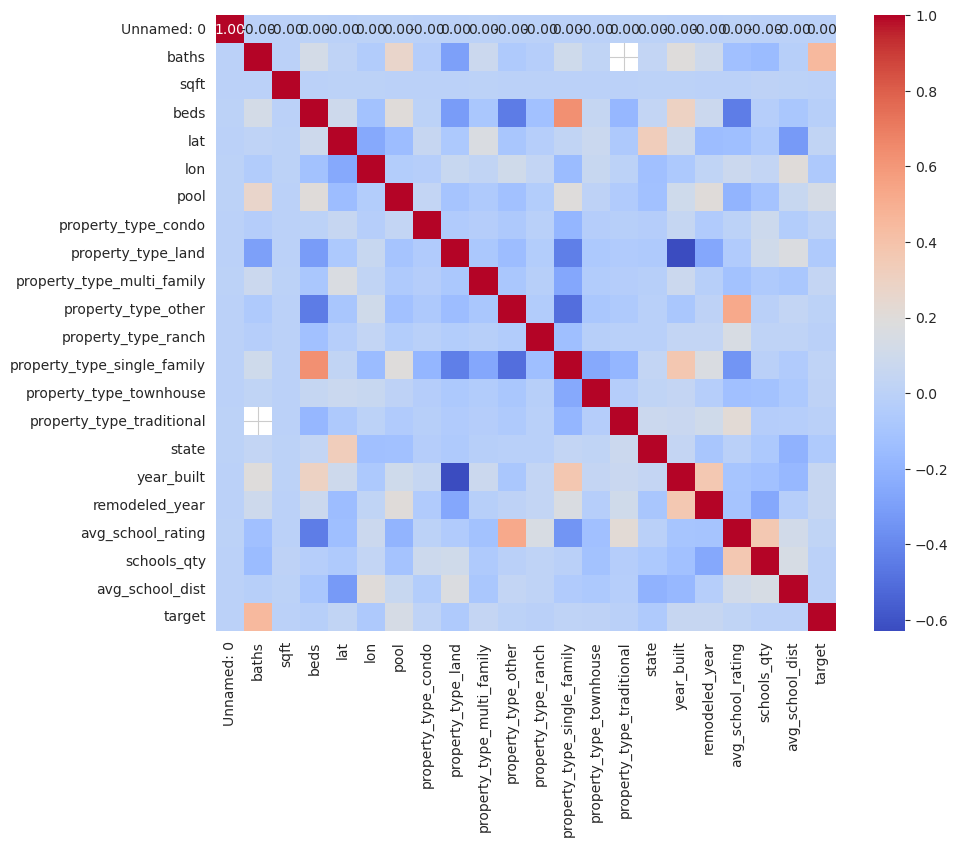

In [5]:
plt.figure(figsize=(10, 8))  # Вы можете изменить размер карты в зависимости от вашего набора данных
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()